In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [151]:
resp = []
from numpy.linalg import norm
for i,x in enumerate(raitings):
    dif = 0
    
    for j,y in enumerate(raitings):
        if i != j : 
            if dif < (np.dot(x,y) / (norm(x) * norm(y))):
                dif = (np.dot(x,y) / (norm(x) * norm(y)))
                y_j = j
           
        #print(i,j,dif,(np.dot(x,y) / (norm(x) * norm(y))))
    
    resp.append([i,y_j])  #Это правильно или по-другому надо делать?
        
resp

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 2]]

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [49]:
#Воспользуемся методом главных компонент
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(raitings)
#print(pca.explained_variance_ratio_)

X = pca.transform(raitings)
X

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [54]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(raitings)
X_reduced

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

2tg(sin(1) + cos(5))(cos(1) -2sin(5))


In [51]:
import math
from scipy.misc import derivative
def f(x):
    return math.tan(math.sin(x) + math.cos(2*x+3))**2
derivative(f, 1, dx=1e-6,n=1)

55.3859176464222

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [111]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [112]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [113]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

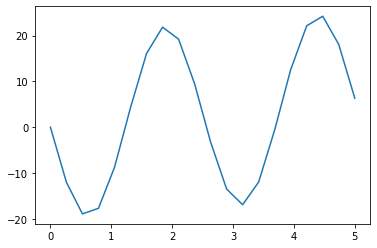

In [114]:
plt.plot(x, fx)
plt.show()

In [115]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [126]:
from scipy.optimize import differential_evolution

In [132]:
bounds = [(-5, 5), (-5, 5)]
result = differential_evolution(error, bounds, seed=42)
result

     fun: 1.5132830286646026e-06
     jac: array([132.41256092, 502.55754962])
 message: 'Optimization terminated successfully.'
    nfev: 1953
     nit: 62
 success: True
       x: array([ 3. , -2.5])

In [129]:
error([3,-2.5])

1.5163282505170628e-06

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [66]:
P1 = np.random.randint(low=1, high=100, size=20)
P1

array([50, 90, 39, 40, 53, 96, 20, 13, 38, 16,  3, 18, 31, 86,  5, 56, 45,
       25, 56, 17])

In [69]:
sampl1 = choice(P1, size=(1000, 50))
sampl1

array([[31, 45, 56, ..., 56,  5, 56],
       [38, 38, 25, ..., 20,  3,  5],
       [20, 16, 13, ..., 20, 18,  3],
       ...,
       [56, 40, 90, ..., 31, 86, 20],
       [17, 45, 13, ..., 53,  5, 17],
       [56, 86, 38, ..., 17, 56, 31]])

In [95]:
fm = sampl1.mean(axis=1)
fm

array([40.82, 34.32, 37.1 , 40.12, 40.92, 42.78, 37.46, 36.46, 38.28,
       42.64, 42.68, 43.76, 40.44, 39.28, 41.22, 35.9 , 47.76, 37.92,
       36.52, 33.78, 37.7 , 44.54, 37.86, 40.92, 40.2 , 39.6 , 39.02,
       42.28, 43.36, 37.  , 47.66, 45.34, 41.22, 44.38, 29.12, 35.62,
       34.7 , 47.18, 39.66, 45.04, 38.98, 38.74, 45.22, 42.36, 40.82,
       46.78, 41.88, 44.9 , 44.48, 40.6 , 47.96, 43.76, 42.  , 40.04,
       42.5 , 40.1 , 40.66, 36.82, 45.02, 41.9 , 40.46, 42.62, 42.76,
       42.68, 40.28, 37.74, 40.7 , 45.  , 44.24, 39.82, 43.14, 48.86,
       40.7 , 36.1 , 41.72, 39.06, 43.16, 38.3 , 35.88, 41.84, 44.38,
       39.6 , 45.22, 51.32, 41.22, 40.08, 45.1 , 45.46, 35.26, 45.1 ,
       36.84, 38.94, 37.36, 39.3 , 38.06, 38.02, 37.68, 41.14, 36.4 ,
       41.78, 42.72, 36.94, 40.12, 31.5 , 42.08, 41.84, 40.1 , 42.96,
       38.76, 50.82, 44.28, 40.2 , 40.2 , 40.  , 40.22, 37.08, 39.4 ,
       45.26, 42.26, 40.3 , 43.44, 39.58, 36.26, 39.72, 40.46, 40.26,
       38.98, 37.2 ,

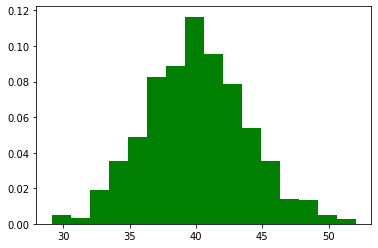

In [97]:
plt.hist(fm, 16, density=True,color='Green')
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [55]:
m = np.array([[1, 4],
              [1, 1]])

In [56]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))   
    print("соответствующий ему собственный вектор " + str(v[:,i]))
print(v)


Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Из уравнения l**2 + 2l -3 = 0 Получаем 2 собственных занчения : 3 и -1.
    Для собственного значения 3 собственный вектор (1,0.5)
    Для собственного значения -1 собственный вектор (1,-0.5)
    